# Task2- Titanic Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

In [5]:
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()

In [7]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 80.90%


In [12]:
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       111
           1       0.76      0.72      0.74        67

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [14]:
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[96 15]
 [19 48]]


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

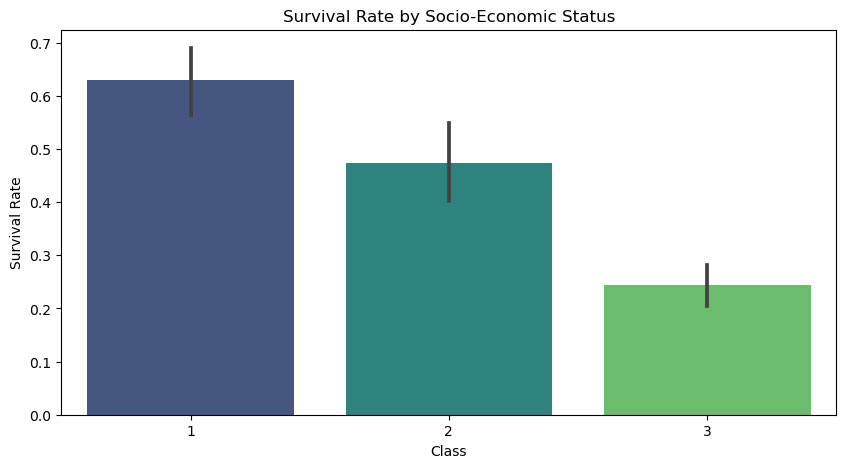

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Socio-Economic Status')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

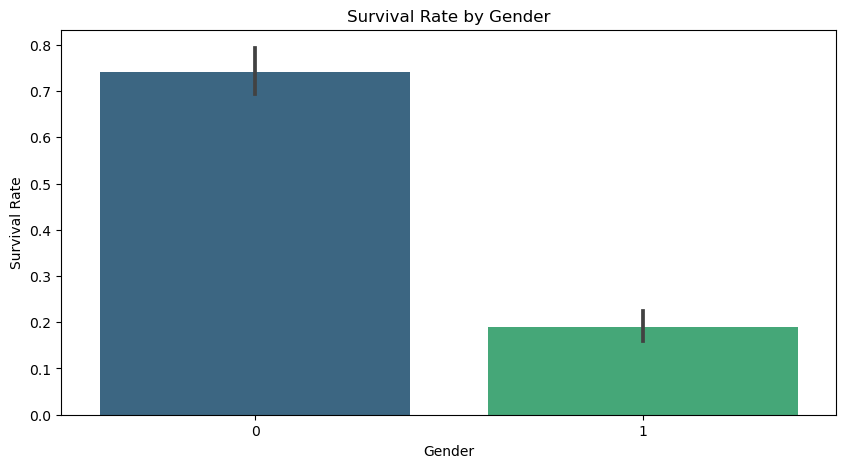

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

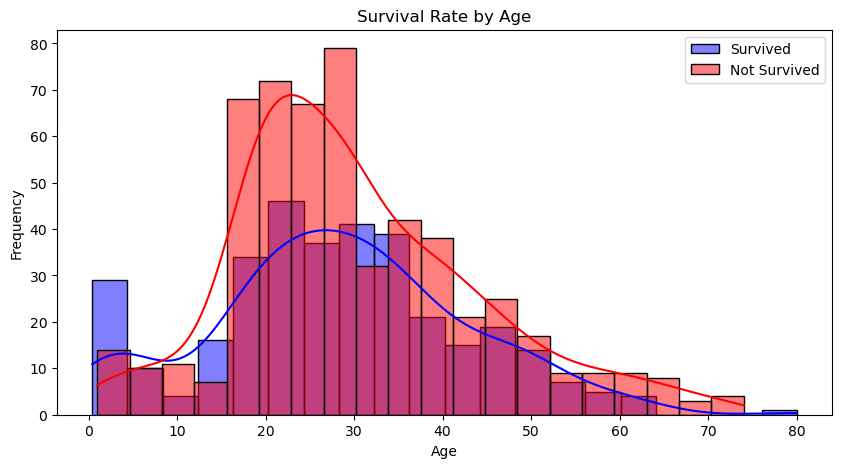

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='blue', label='Survived', bins=20)
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived', bins=20)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [22]:
feature_importance = model.feature_importances_
features = X.columns

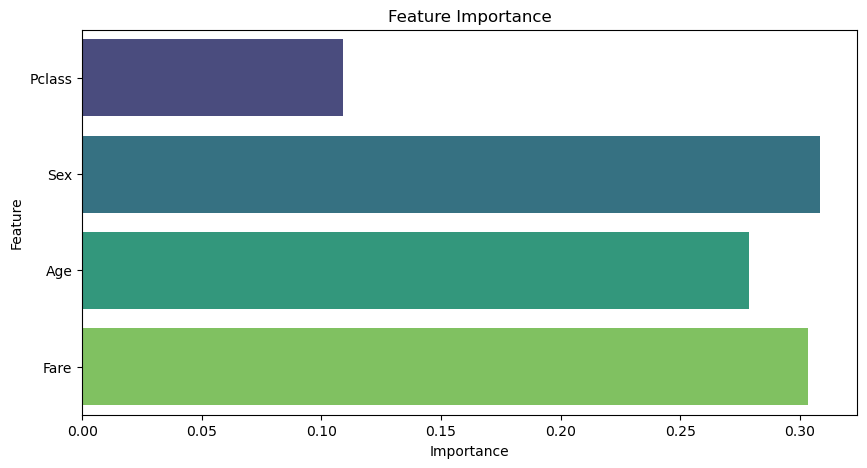

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()